In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten,Dropout
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
!wget https://www.dropbox.com/s/h16vq9rab1itifs/CatDog.zip
!unzip CatDog.zip
!rm CatDog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  inflating: training_set/training_set/cats/cat.3719.jpg  
  infl

In [3]:
height,width = 150,150 #fix image size
train_dir = "/content/training_set/training_set"
test_dir = "/content/test_set/test_set"
batch_size = 32
epochs = 15

In [4]:
import tensorflow.keras.backend as k
k.image_data_format()

'channels_last'

In [5]:
input_shape = (height,width,3)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
#for Image Augmentation
train_datagen = ImageDataGenerator(rescale = 1.0/255 ,
                                   rotation_range=0.2, zoom_range = 0.2,
                                   vertical_flip = True)

train_data = train_datagen.flow_from_directory(directory = train_dir, class_mode = 'binary', target_size = (height,width))

Found 8005 images belonging to 2 classes.


In [8]:
train_data.class_indices

{'cats': 0, 'dogs': 1}

In [9]:
test_datagen = ImageDataGenerator(rescale = 1.0/255 )

test_data = test_datagen.flow_from_directory(directory = test_dir, class_mode = 'binary', target_size = (height,width))

Found 2023 images belonging to 2 classes.


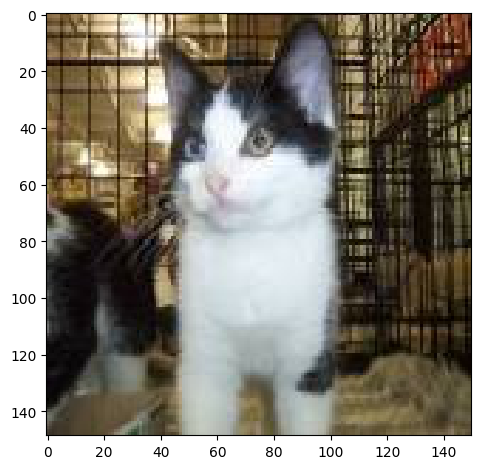

In [10]:
from skimage.io import imshow
imshow("/content/training_set/training_set/cats/cat.1000.jpg")
plt.show()

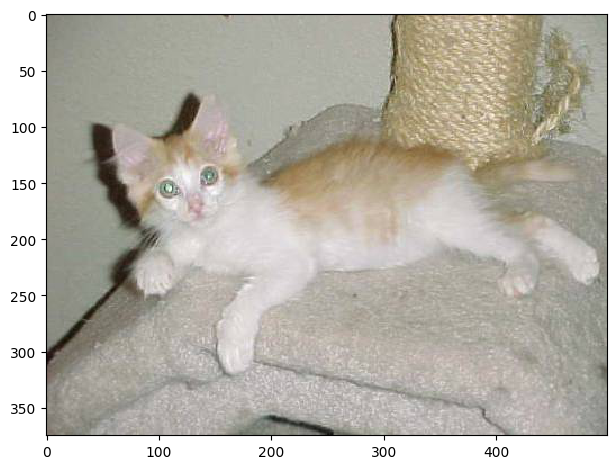

In [11]:
from skimage.io import imshow
imshow("/content/training_set/training_set/cats/cat.1006.jpg")
plt.show()

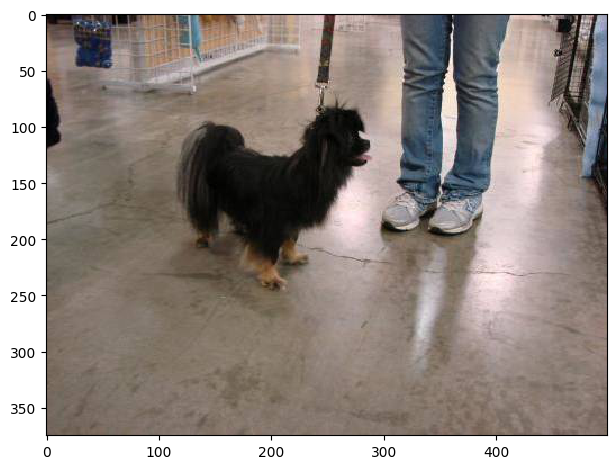

In [12]:
from skimage.io import imshow
imshow("/content/training_set/training_set/dogs/dog.1000.jpg")
plt.show()

# Build the Model

In [13]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape = input_shape, padding='same'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 34, 34, 128)       7

In [14]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [15]:
model.fit(train_data,
validation_data = test_data,
epochs=epochs,
batch_size=batch_size)

Epoch 1/15
251/251 [==============================] - 83s 282ms/step - loss: 0.6919 - accuracy: 0.5259 - val_loss: 0.6743 - val_accuracy: 0.5902
Epoch 2/15
251/251 [==============================] - 69s 273ms/step - loss: 0.6696 - accuracy: 0.5954 - val_loss: 0.6494 - val_accuracy: 0.6248
Epoch 3/15
251/251 [==============================] - 69s 276ms/step - loss: 0.6408 - accuracy: 0.6354 - val_loss: 0.6158 - val_accuracy: 0.6614
Epoch 4/15
251/251 [==============================] - 68s 273ms/step - loss: 0.6113 - accuracy: 0.6627 - val_loss: 0.6376 - val_accuracy: 0.6362
Epoch 5/15
251/251 [==============================] - 70s 281ms/step - loss: 0.5851 - accuracy: 0.6883 - val_loss: 0.5466 - val_accuracy: 0.7281
Epoch 6/15
251/251 [==============================] - 74s 295ms/step - loss: 0.5557 - accuracy: 0.7179 - val_loss: 0.5269 - val_accuracy: 0.7346
Epoch 7/15
251/251 [==============================] - 70s 280ms/step - loss: 0.5342 - accuracy: 0.7299 - val_loss: 0.5114 - val_ac

In [16]:
!wget https://www.dropbox.com/s/m29kun39a6ogeif/test_cat1.jpg

--2023-06-17 16:00:09--  https://www.dropbox.com/s/m29kun39a6ogeif/test_cat1.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/m29kun39a6ogeif/test_cat1.jpg [following]
--2023-06-17 16:00:09--  https://www.dropbox.com/s/raw/m29kun39a6ogeif/test_cat1.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 404 Not Found
2023-06-17 16:00:09 ERROR 404: Not Found.



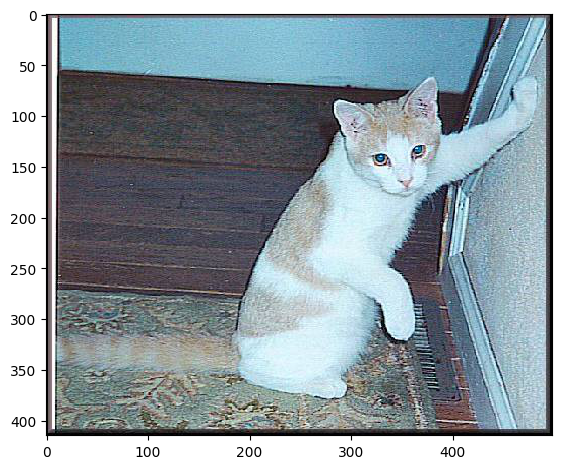

In [17]:
imshow("/content/test_set/test_set/cats/cat.4001.jpg")

In [18]:
# Steps to generate the prediction
# Load the image data
# Reshape to 150,150
# Rescale
# add the additional axis
# model.predict(image)

In [19]:
from tensorflow.keras.utils import load_img, img_to_array

pil = load_img("/content/test_set/test_set/cats/cat.4001.jpg", target_size=(150,150))

image = img_to_array(pil)
image.shape

(150, 150, 3)

In [22]:
image = image/255.0

In [23]:
# Add a new dimension at axis=0
image = np.expand_dims(image,axis=0)
image.shape

(1, 150, 150, 3)

In [24]:
(model.predict(image) > 0.5).astype("int")

1/1 [==============================] - 0s 333ms/step


array([[0]])

In [26]:
# Cat = 0
# Dog = 1

In [27]:
#saving  (Serialization and Deseriliazation)
model.save("final_model.h5")

#load the model
from tensorflow.keras.models import load_model
best_model = load_model("final_model.h5")

In [28]:
(model.predict(image) > 0.5).astype('int')

1/1 [==============================] - 0s 21ms/step


array([[0]])

In [29]:
# Next Session:
# Transfer Learning

# Training with VGG16 Model

# New Section

In [30]:
from tensorflow.keras.applications.vgg16 import VGG16

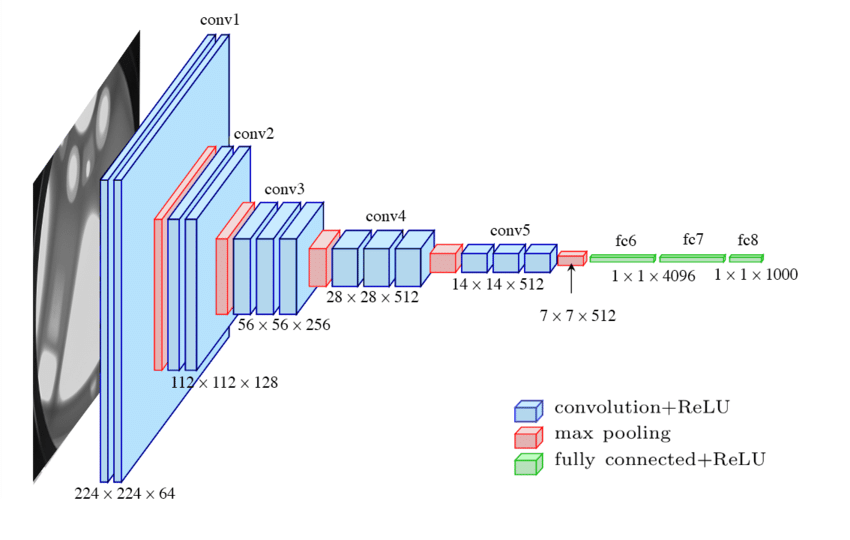

In [31]:
vgg_full = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=True)
vgg_full.summary()

# Imagenet --> is a classification problem with 1000 classes

553467096/553467096 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [33]:
vgg_partial = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
vgg_partial.summary()

# Imagenet --> is a classification problem with 1000 classes

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [34]:
len(vgg_partial.layers)

19

In [36]:
#set final layers are trainable

for layer in vgg_partial.layers[:15]:
  layer.trainable = False

for layer in vgg_partial.layers[15:] :
  layer.trainable = True

In [35]:
final_layer = vgg_partial.layers[-1]
output = Flatten()(final_layer.output)
output = Dense(512,activation='relu') (output)
output = Dense(1, activation='sigmoid') (output)

In [37]:
from tensorflow.keras.models import Model
final_model = Model(vgg_partial.input, output)

In [38]:
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [40]:
from tensorflow.keras.layers import GlobalMaxPool2D

In [41]:
final_layer = vgg_partial.layers[-1]
output = GlobalMaxPool2D()(final_layer.output)
output = Dense(512,activation='relu') (output)
output = Dense(1, activation='sigmoid') (output)

final_model = Model(vgg_partial.input, output)

final_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [42]:
model.compile(loss = 'binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [43]:
model.fit(train_data,
          validation_data = test_data,
          epochs=epochs,
          batch_size=batch_size)

Epoch 1/15
251/251 [==============================] - 75s 286ms/step - loss: 0.4211 - accuracy: 0.8072 - val_loss: 0.4740 - val_accuracy: 0.8018
Epoch 2/15
251/251 [==============================] - 69s 274ms/step - loss: 0.3923 - accuracy: 0.8201 - val_loss: 0.4355 - val_accuracy: 0.8191
Epoch 3/15
251/251 [==============================] - 74s 294ms/step - loss: 0.3955 - accuracy: 0.8196 - val_loss: 0.4716 - val_accuracy: 0.7973
Epoch 4/15
251/251 [==============================] - 70s 278ms/step - loss: 0.3868 - accuracy: 0.8239 - val_loss: 0.4202 - val_accuracy: 0.8196
Epoch 5/15
251/251 [==============================] - 69s 275ms/step - loss: 0.3672 - accuracy: 0.8351 - val_loss: 0.4672 - val_accuracy: 0.7929
Epoch 6/15
251/251 [==============================] - 69s 276ms/step - loss: 0.3615 - accuracy: 0.8406 - val_loss: 0.4256 - val_accuracy: 0.8225
Epoch 7/15
251/251 [==============================] - 69s 274ms/step - loss: 0.3466 - accuracy: 0.8473 - val_loss: 0.4423 - val_ac

In [44]:
model.evaluate(test_data)

64/64 [==============================] - 7s 107ms/step - loss: 0.4067 - accuracy: 0.8304


[0.40672051906585693, 0.8304498195648193]

In [ ]:
# Callbacks
# Early stopping , model checkpoint

In [45]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [46]:
mc = ModelCheckpoint(filepath='best_model.h5', monitor = 'val_loss', save_best_only=True , verbose=1)

In [47]:
model.fit(train_data,
          validation_data = test_data,
          epochs=4,
          batch_size=batch_size,
          callbacks=[mc])

Epoch 1/4
251/251 [==============================] - ETA: 0s - loss: 0.2845 - accuracy: 0.8766
Epoch 1: val_loss improved from inf to 0.44239, saving model to best_model.h5
251/251 [==============================] - 69s 273ms/step - loss: 0.2845 - accuracy: 0.8766 - val_loss: 0.4424 - val_accuracy: 0.8329
Epoch 2/4
251/251 [==============================] - ETA: 0s - loss: 0.2771 - accuracy: 0.8822
Epoch 2: val_loss did not improve from 0.44239
251/251 [==============================] - 68s 272ms/step - loss: 0.2771 - accuracy: 0.8822 - val_loss: 0.4715 - val_accuracy: 0.8240
Epoch 3/4
251/251 [==============================] - ETA: 0s - loss: 0.2792 - accuracy: 0.8851
Epoch 3: val_loss did not improve from 0.44239
251/251 [==============================] - 69s 274ms/step - loss: 0.2792 - accuracy: 0.8851 - val_loss: 0.4535 - val_accuracy: 0.8290
Epoch 4/4
251/251 [==============================] - ETA: 0s - loss: 0.2733 - accuracy: 0.8829
Epoch 4: val_loss did not improve from 0.44239

In [48]:
mc = ModelCheckpoint(filepath='best_model.h5', monitor = 'val_loss', save_best_only=False , verbose=1)

In [49]:
model.fit(train_data,
          validation_data = test_data,
          epochs=4,
          batch_size=batch_size,
          callbacks=[mc])

Epoch 1/4
251/251 [==============================] - ETA: 0s - loss: 0.2712 - accuracy: 0.8819
Epoch 1: saving model to best_model.h5
251/251 [==============================] - 69s 276ms/step - loss: 0.2712 - accuracy: 0.8819 - val_loss: 0.4533 - val_accuracy: 0.8364
Epoch 2/4
251/251 [==============================] - ETA: 0s - loss: 0.2591 - accuracy: 0.8943
Epoch 2: saving model to best_model.h5
251/251 [==============================] - 68s 272ms/step - loss: 0.2591 - accuracy: 0.8943 - val_loss: 0.4579 - val_accuracy: 0.8225
Epoch 3/4
251/251 [==============================] - ETA: 0s - loss: 0.2503 - accuracy: 0.8982
Epoch 3: saving model to best_model.h5
251/251 [==============================] - 69s 275ms/step - loss: 0.2503 - accuracy: 0.8982 - val_loss: 0.4425 - val_accuracy: 0.8334
Epoch 4/4
251/251 [==============================] - ETA: 0s - loss: 0.2555 - accuracy: 0.8913
Epoch 4: saving model to best_model.h5
251/251 [==============================] - 68s 271ms/step - lo

In [50]:
es = EarlyStopping(monitor='val_loss',min_delta=0.5,patience=2,verbose=1)

In [51]:
model.fit(train_data,
          validation_data = test_data,
          epochs=100,
          batch_size=batch_size,
          steps_per_epoch=10,
          validation_steps=10,
          callbacks=[mc,es])

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 0.2301 - accuracy: 0.9062
Epoch 1: saving model to best_model.h5
10/10 [==============================] - 4s 381ms/step - loss: 0.2301 - accuracy: 0.9062 - val_loss: 0.4530 - val_accuracy: 0.8344
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.1945 - accuracy: 0.9250
Epoch 2: saving model to best_model.h5
10/10 [==============================] - 4s 365ms/step - loss: 0.1945 - accuracy: 0.9250 - val_loss: 0.4065 - val_accuracy: 0.8438
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 0.2311 - accuracy: 0.9062
Epoch 3: saving model to best_model.h5
10/10 [==============================] - 4s 372ms/step - loss: 0.2311 - accuracy: 0.9062 - val_loss: 0.6703 - val_accuracy: 0.7969
Epoch 3: early stopping


## Made by saharsh 